<a href="https://colab.research.google.com/github/tcal42/actralyze/blob/master/actralyzer_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [0]:
!pip install transformers

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train_comments.csv to train_comments.csv


In [0]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("train_comments.csv")

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 792



,segment,category,sentiment,comment
528,IL-ETH,overall satisfaction,NaN,Services on weekends is “no service.” Saturday...
356,IL-HSD,overall satisfaction,positive,My 3 1/2 months have exceeded my expectations.
168,AL,activities,negative,I think it would be nice to have a few more si...
135,AL,overall satisfaction,positive,Everything has gone as planned so far.
403,IL-BBV,parking,negative,More free parking
389,IL-HSD,overall satisfaction,positive,"Wonderful, compatible, well run, lovely inside..."
257,MC,overall satisfaction,positive,"Upon meeting many Jane Elke at any time, I've ..."
237,MC,food quality,negative,Better food - higher temperature in home
481,IL-BBV,food service,negative,Suggest dining room supervisors check what rem...
652,IL-BBV,medical services,NaN,A life with trained nurses available instead o...


In [0]:
# Get the lists of sentences and their labels.
texts = df.comment.values
# labels = df.category.values

In [0]:
from sklearn import preprocessing

categories = df['category'].tolist()
le = preprocessing.LabelEncoder()
le.fit(categories)
list(le.classes_)

df['category_int'] = le.fit_transform(df['category'])
labels = df.category_int.values

labels

array([18, 11, 17,  6,  1,  0,  4, 18, 17, 17,  3,  4,  0, 18, 12,  7, 18,
        4,  9,  4, 11, 18, 17, 11,  8,  0,  1,  1, 17,  4, 18, 17,  1, 17,
       17, 17,  6,  7, 18, 12, 18,  7, 17,  1, 18, 17, 16, 18, 13, 14,  3,
       17,  0, 16,  7, 18,  0,  3, 19, 18, 10,  1, 17,  5, 14, 14, 13, 14,
        0,  0,  1, 13,  1,  8,  0, 17,  8, 18, 13, 14,  3, 14, 17, 17, 17,
       17,  0, 17, 14, 14, 13, 17, 16, 17, 14,  4,  1,  1,  0,  6, 17,  1,
       14, 10, 14, 19, 14, 17,  5, 17,  8,  3,  7, 19,  6, 17,  6,  7, 17,
        6,  6, 17,  6, 17, 17,  0, 17,  8, 16,  8, 19, 14, 14,  8, 12, 14,
        4, 17, 14, 16, 14,  1, 17,  0,  1, 17,  8,  1,  0,  3, 17, 14, 17,
        0, 17,  4,  0, 13,  1, 13, 13, 11, 17,  1,  4,  6,  8, 17,  0, 17,
       14, 14,  4, 16,  0, 17, 10, 17, 17, 13,  2,  1,  0, 17, 14,  4, 14,
        6, 17, 14,  4, 14,  0, 13, 14, 17, 11, 11, 17, 16,  0,  1, 11, 17,
       14,  3, 17, 13, 17,  1, 14, 17,  1, 14,  8, 12, 10,  4,  1, 14, 14,
       17, 13, 13,  1, 17

In [0]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [0]:
# Print the original sentence.
print(' Original: ', texts[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(texts[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))

 Original:  More CNA's
Tokenized:  ['more', 'cn', '##a', "'", 's']
Token IDs:  [2062, 27166, 2050, 1005, 1055]


In [0]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for text in texts:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_text = tokenizer.encode(
                        text,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_text)

# Print sentence 0, now as a list of IDs.
print('Original: ', texts[0])
print('Token IDs:', input_ids[0])

Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1160 > 512). Running this sequence through the model will result in indexing errors


Original:  More CNA's
Token IDs: [101, 2062, 27166, 2050, 1005, 1055, 102]


In [0]:
import numpy as np

print('Max sentence length: ', max([len(text) for text in input_ids]))
print('Mean sentence length: ', np.mean([len(text) for text in input_ids]))
print('Median sentence length: ', np.median([len(text) for text in input_ids]))

Max sentence length:  1162
Mean sentence length:  38.89646464646464
Median sentence length:  26.0


In [0]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64 

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [0]:
# Create attention masks
attention_masks = []

# For each sentence...
for text in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in text]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [0]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

In [0]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


In [0]:
len(le.classes_)

20

In [0]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = len(le.classes_), # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [0]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [0]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 10

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [0]:
import numpy as np
from sklearn.metrics import f1_score

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def flat_macro_f1_score(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, pred_flat, average='macro')

def flat_micro_f1_score(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, pred_flat, average='micro')

In [0]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [0]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
      
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    eval_macro_f1_score, eval_micro_f1_score = 0, 0 # new
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        tmp_eval_macro_f1_score = flat_macro_f1_score(logits, label_ids)
        tmp_eval_micro_f1_score = flat_micro_f1_score(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        eval_macro_f1_score += tmp_eval_macro_f1_score
        eval_micro_f1_score += tmp_eval_micro_f1_score

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Macro F1: {0:.2f}".format(eval_macro_f1_score/nb_eval_steps))
    print("  Micro F1: {0:.2f}".format(eval_micro_f1_score/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")




======== Epoch 1 / 10 ========
Training...

  Average training loss: 2.88
  Training epoch took: 0:00:09

Running Validation...
  Accuracy: 0.18
  Macro F1: 0.11
  Micro F1: 0.18
  Validation took: 0:00:00

======== Epoch 2 / 10 ========
Training...

  Average training loss: 2.58
  Training epoch took: 0:00:09

Running Validation...
  Accuracy: 0.25
  Macro F1: 0.15
  Micro F1: 0.25
  Validation took: 0:00:00

======== Epoch 3 / 10 ========
Training...

  Average training loss: 2.26
  Training epoch took: 0:00:09

Running Validation...
  Accuracy: 0.36
  Macro F1: 0.25
  Micro F1: 0.36
  Validation took: 0:00:00

======== Epoch 4 / 10 ========
Training...

  Average training loss: 1.82
  Training epoch took: 0:00:09

Running Validation...
  Accuracy: 0.43
  Macro F1: 0.30
  Micro F1: 0.43
  Validation took: 0:00:00

======== Epoch 5 / 10 ========
Training...

  Average training loss: 1.38
  Training epoch took: 0:00:09

Running Validation...
  Accuracy: 0.51
  Macro F1: 0.40
  Micro F

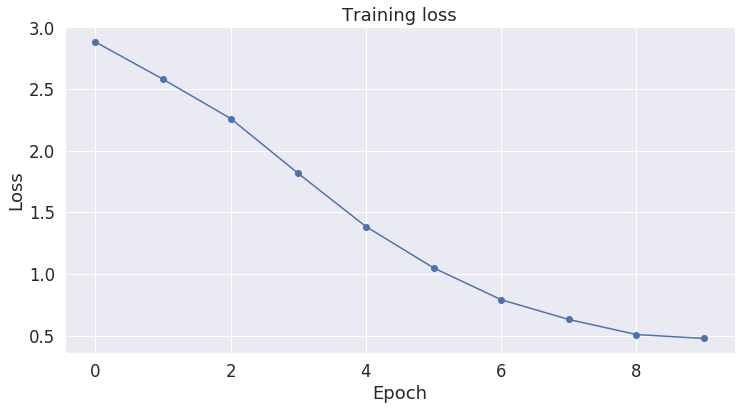

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving pool_comments.csv to pool_comments.csv


In [0]:
df = pd.read_csv("pool_comments.csv")

In [0]:
df.head()
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
df.comment.values

Number of test sentences: 4,826



array(['Absolutely fabulous in both areas. Food and service is top rate. We actually compare outside restaurants and their service to ours here at Highland Springs. Always H.S. is best and our high school servers beautifully trained.',
       'At the cafe, could we have an old-fashioned meatloaf on occasion?',
       'Awesome! Amazing!', ...,
       "Would like to see a more appropriate space given to the Treasure Chest. They do a great job. But it's hard to work in cramped quarters which are also separated.",
       'You can see from my answer that I am a happy camper. The people and residents are good; the staff is excellent and all the workers are pleasant and helpful.',
       'Your pumpkin pie is delicious. Do you think we might have 2 or maybe even three squirts of whipped cream?'],
      dtype=object)

In [0]:
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
texts = df.comment.values
# labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for text in texts:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_text = tokenizer.encode(
                        text,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_text)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
# prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks) #, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 4,826



In [0]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions = [ ]
# true_labels = []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  # label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  # true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 4,826 test sentences...
    DONE.


In [0]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions_logit = [item for sublist in predictions for item in sublist]
flat_predictions_class = np.argmax(flat_predictions_logit, axis=1).flatten()

flat_predictions_class
np.save('predictions', flat_predictions_class)

In [0]:
len(flat_predictions_class)
texts[2243]

'Do it myself.'

In [0]:
le.inverse_transform([flat_predictions_class[2243]])

array(['other'], dtype=object)

In [0]:
# Determine the least certain predictions via their class probabilities

flat_predictions_probs = np.exp(flat_predictions_logit) / (1 + np.exp(flat_predictions_logit))
predictions_uncertainty = 1 - np.max(flat_predictions_probs, axis=1)

In [0]:
np.max(predictions_uncertainty)

0.26645738

In [0]:
np.argmax(predictions_uncertainty)

1222

In [0]:
set_to_label = np.argsort(-predictions_uncertainty)[:100] # indices of maximum uncertainty

In [0]:
texts[set_to_label]

array(['I am still new. Some things are as expected, others are inconsistent, or sales office did not know or was misleading. Resident population is older and frailer than expected. I would recommend some of Brooksby Village to family and friends.',
       'We need more resident input over future plans and development and not only corporate planning. The new Community Room in Willow Ridge should never have been located where it is. My walk from my apartment is almost 1/4 of a mile. I am a retired architect and could certainly provide my knowledge in future planning.',
       'Hired our own that was recommended. Very Satisfied.',
       'Sometimes the Care feels like a stepchild. We should have an ice cream cart instead of a makeshift arrangement. The installation of a microwave has been a big plus.',
       "We have a new Resident Handbook that is very clear in regard to rules and regulations. I am concerned that residents cannot count on the Handbook being enforced. I believe that res

In [0]:
df

,segment,comment
0,IL-HSD,Absolutely fabulous in both areas. Food and se...
1,IL-HSD,"At the cafe, could we have an old-fashioned me..."
2,IL-HSD,Awesome! Amazing!
3,IL-HSD,Being served by student helpers is a pleasant ...
4,IL-HSD,Buffet items are rarely hot. Other than that d...
...,...,...
4821,IL-ETH,Why no questions re: Marketing? Staff seems un...
4822,IL-ETH,With the full assurance that friends & neighbo...
4823,IL-ETH,Would like to see a more appropriate space giv...
4824,IL-ETH,You can see from my answer that I am a happy c...


In [0]:
texts_to_label = df.iloc[set_to_label]

In [0]:
# save texts to label to file
texts_to_label.to_csv("./texts_to_label.csv", encoding='utf-8', index=False)

In [0]:
df_drop = df.drop(set_to_label)

In [0]:
# drop sets to label from the training pool
df_drop.to_csv("./pool_comments_update.csv", encoding='utf-8', index=False)

In [0]:
texts_to_label

,segment,comment
1222,IL-BBV,"I am still new. Some things are as expected, o..."
1148,IL-HSD,We need more resident input over future plans ...
2324,IL-BBV,Hired our own that was recommended. Very Satis...
4007,IL-ETH,Sometimes the Care feels like a stepchild. We ...
1140,IL-HSD,We have a new Resident Handbook that is very c...
...,...,...
4083,IL-ETH,General Services has improved a great deal in ...
4109,IL-ETH,I've always had responsive answers to my quest...
3553,IL-BBV,I would like to know more about the single lad...
4668,IL-ETH,Help very slow in answering bell in continuing...


In [0]:
df_drop

,segment,comment
0,IL-HSD,Absolutely fabulous in both areas. Food and se...
1,IL-HSD,"At the cafe, could we have an old-fashioned me..."
2,IL-HSD,Awesome! Amazing!
3,IL-HSD,Being served by student helpers is a pleasant ...
4,IL-HSD,Buffet items are rarely hot. Other than that d...
...,...,...
4821,IL-ETH,Why no questions re: Marketing? Staff seems un...
4822,IL-ETH,With the full assurance that friends & neighbo...
4823,IL-ETH,Would like to see a more appropriate space giv...
4824,IL-ETH,You can see from my answer that I am a happy c...


In [0]:
df

,segment,comment
0,IL-HSD,Absolutely fabulous in both areas. Food and se...
1,IL-HSD,"At the cafe, could we have an old-fashioned me..."
2,IL-HSD,Awesome! Amazing!
3,IL-HSD,Being served by student helpers is a pleasant ...
4,IL-HSD,Buffet items are rarely hot. Other than that d...
...,...,...
4821,IL-ETH,Why no questions re: Marketing? Staff seems un...
4822,IL-ETH,With the full assurance that friends & neighbo...
4823,IL-ETH,Would like to see a more appropriate space giv...
4824,IL-ETH,You can see from my answer that I am a happy c...


In [0]:
df_preds = pd.DataFrame(flat_predictions_class)
df['preds']= df_preds

In [0]:
df

,segment,comment,preds
0,IL-HSD,Absolutely fabulous in both areas. Food and se...,7
1,IL-HSD,"At the cafe, could we have an old-fashioned me...",7
2,IL-HSD,Awesome! Amazing!,14
3,IL-HSD,Being served by student helpers is a pleasant ...,7
4,IL-HSD,Buffet items are rarely hot. Other than that d...,7
...,...,...,...
4821,IL-ETH,Why no questions re: Marketing? Staff seems un...,11
4822,IL-ETH,With the full assurance that friends & neighbo...,17
4823,IL-ETH,Would like to see a more appropriate space giv...,5
4824,IL-ETH,You can see from my answer that I am a happy c...,17


In [0]:
df.to_csv("./labeled_pool_comments.csv", encoding='utf-8', index=False)